# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Luca Diogo da Silva
# NUSP : 12542693
# Turma: BCC
# Prof.: Ronaldo
##################################################################

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os 
import pandas as pd

In [ ]:
def gera_histograma(img):
  hist = np.zeros(256)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      hist[int(img[i][j])] += 1
  return hist


def equaliza_histograma(img):
  x, y = img.shape
  hist = gera_histograma(img)
  hist /= (x * y)
  transf = np.zeros(256)

  transf[0] = hist[0]
  for i in range(1, 256):
      transf[i] = hist[i] + transf[i-1]

  transf *= 255

  eq_img = np.zeros(img.shape)
  hist = np.zeros(256)
  for i in range(x):
    for j in range(y):
      eq_img[i, j] = np.rint(transf[img[i, j]])
      hist[int(eq_img[i][j])] += 1

  return eq_img, hist

## Equalização de histograma

In [ ]:
parent = "datasets"
normal_path = os.path.join(parent, "normalizedDataset")

if not os.path.isdir(normal_path):
    os.mkdir(normal_path)

augm_path = os.path.join(parent, "augmentedDataset")
dirs  = ["originalGrayDataset"] + [os.path.join("augmentedDataset", d) for d in os.listdir(augm_path)]

print(dirs)

new_augm_path = os.path.join(normal_path, "augmentedDataset")
if not os.path.isdir(new_augm_path):
    os.mkdir(new_augm_path)

for d in dirs:
    path = os.path.join(normal_path, d)
    if not os.path.isdir(path):
        os.mkdir(path)



In [ ]:
histogramas_originais = {d: {ilum: np.zeros(256) for ilum in df["Iluminacao"].unique()} for d in dirs}
histogramas_normalizados =  {d: {ilum: np.zeros(256) for ilum in df["Iluminacao"].unique()} for d in dirs}

print(histogramas_originais.keys())
print(histogramas_originais["originalGrayDataset"].keys())


n_imagens = 45
df = pd.read_csv("metadados.csv")
a = [df["Iluminacao"].iloc[i] for i in range(n_imagens)]


for d in dirs:
    src_path = os.path.join(parent, d)
    dst_path = os.path.join(normal_path, d)

    for img in os.listdir(src_path):
        ilum = a[int(img.split(".")[0]) - 1]
        img_path = os.path.join(src_path, img)
        img_mat = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(int)

        hist = gera_histograma(img_mat)
        histogramas_originais[d][ilum] += hist

        eq_img, eq_hist = equaliza_histograma(img_mat)
        histogramas_normalizados[d][ilum] += eq_hist
        
        number = img.split(".")[0]
        cv2.imwrite(os.path.join(dst_path, f"{number}.jpg"), eq_img)
            
        print(img, ilum)

    print(d)
    




In [169]:
def plot_img(img1, img2):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
  ax1.imshow(img1, cmap='gray', vmin=0, vmax=255)
  ax1.set_title("Exemplo original")
  ax1.axis('off')
  
  ax2.imshow(img2, cmap='gray', vmin=0, vmax=255)
  ax2.set_title("Exemplo normalizado")
  ax2.axis('off')
  plt.show()


def plot_histograma(hist1, hist2):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
  ax1.bar(np.arange(0, 256), hist1)
  ax2.bar(np.arange(0, 256), hist2)
  ax1.set_title("Histograma médio original")
  ax2.set_title("Histograma médio após normalização")
  
  
  plt.show()

def demonstrar(dataset, ilum, h1=histogramas_originais, h2=histogramas_normalizados, n_imagens=45):
    parent = "datasets"
    exemplos = {ilum: f"{df['Iluminacao'].eq(ilum).idxmax()+1}.jpg" for ilum in df["Iluminacao"].unique()}
    
    src_path = os.path.join(parent, dataset)
    dst_path = os.path.join(normal_path, dataset)

    plot_histograma(h1[dataset][ilum] / n_imagens, h2[dataset][ilum] / n_imagens)


    orig_img = cv2.imread(os.path.join(src_path, exemplos[ilum]), cv2.IMREAD_GRAYSCALE).astype(int)
    normal_img = cv2.imread(os.path.join(dst_path, exemplos[ilum]), cv2.IMREAD_GRAYSCALE).astype(int)
    plot_img(orig_img, normal_img)



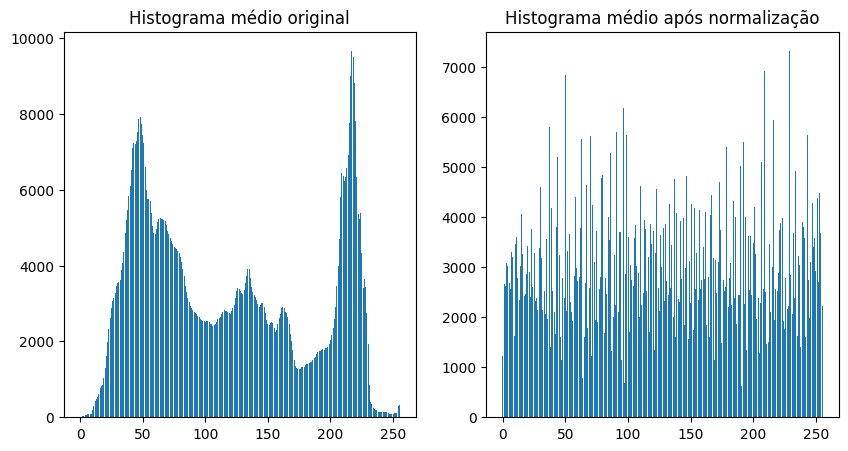

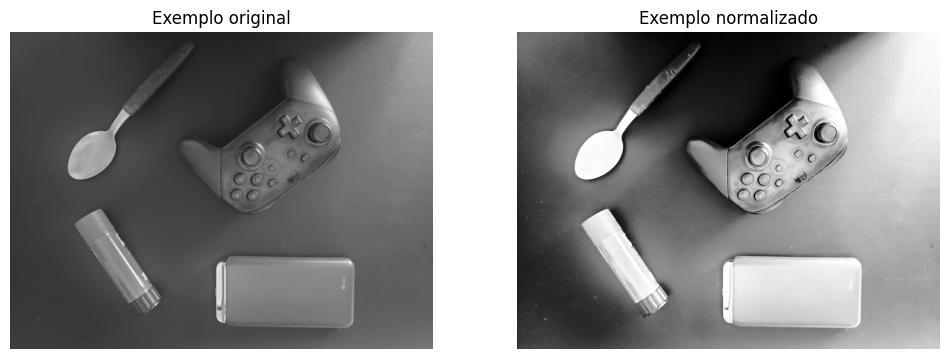

In [171]:
demonstrar("originalGrayDataset", "dentro de casa - dia")


In [ ]:
demonstrar("originalGrayDataset", "fora de casa - dia")


In [ ]:
demonstrar("originalGrayDataset", "dentro de casa - noite")


In [ ]:
demonstrar("originalGrayDataset", "fora de casa - noite")


In [ ]:
demonstrar("augmentedDataset/contrastStretching", "dentro de casa - dia")


In [ ]:
demonstrar("augmentedDataset/contrastStretching", "fora de casa - dia")


In [ ]:
demonstrar("augmentedDataset/contrastStretching", "dentro de casa - noite")


In [ ]:
demonstrar("augmentedDataset/contrastStretching", "fora de casa - noite")


In [ ]:
demonstrar("augmentedDataset/exponencial", "dentro de casa - dia")


In [ ]:
demonstrar("augmentedDataset/exponencial", "fora de casa - dia")


In [ ]:
demonstrar("augmentedDataset/exponencial", "dentro de casa - noite")


In [ ]:
demonstrar("augmentedDataset/exponencial", "fora de casa - noite")


In [ ]:
demonstrar("augmentedDataset/laplace", "dentro de casa - dia")


In [ ]:
demonstrar("augmentedDataset/laplace", "fora de casa - dia")


In [ ]:
demonstrar("augmentedDataset/laplace", "dentro de casa - noite")


In [ ]:
demonstrar("augmentedDataset/laplace", "fora de casa - noite")


In [ ]:
demonstrar("augmentedDataset/logaritmo", "dentro de casa - dia")


In [ ]:
demonstrar("augmentedDataset/logaritmo", "fora de casa - dia")


In [ ]:
demonstrar("augmentedDataset/logaritmo", "dentro de casa - noite")


In [ ]:
demonstrar("augmentedDataset/logaritmo", "fora de casa - noite")


In [ ]:
demonstrar("augmentedDataset/media", "dentro de casa - dia")


In [ ]:
demonstrar("augmentedDataset/media", "fora de casa - dia")


In [ ]:
demonstrar("augmentedDataset/media", "dentro de casa - noite")


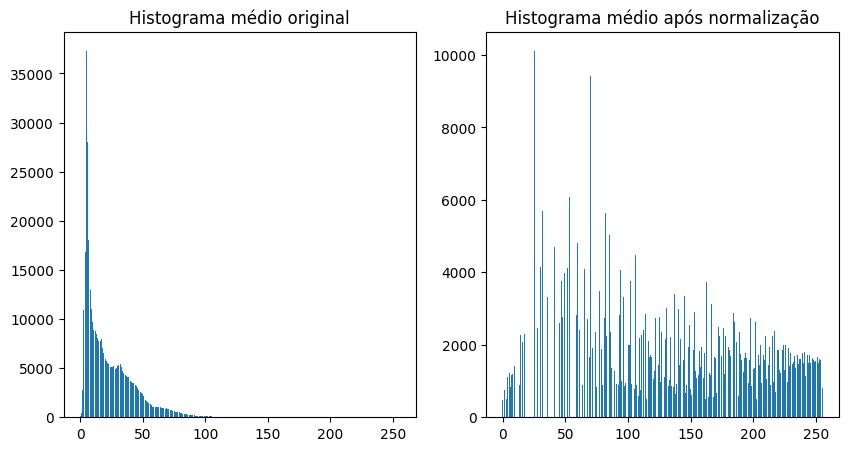

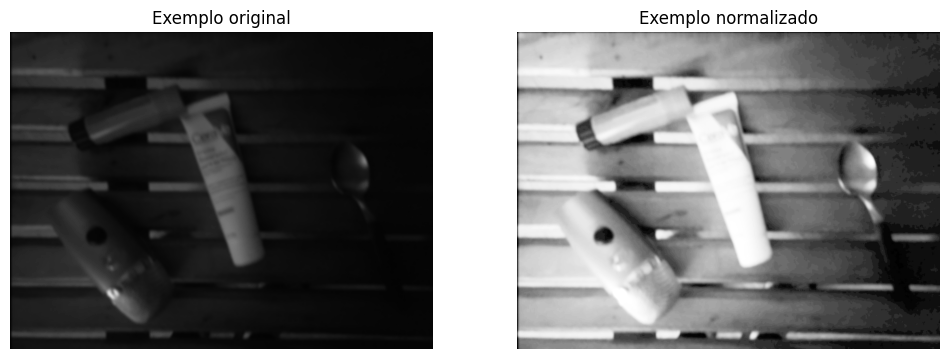

In [168]:
demonstrar("augmentedDataset/media", "fora de casa - noite")


Pelos exemplos acima, vemos que a iluminação que mais sofre impacto da normalização é a fora de casa, durante o dia, onde as imagens normalizadas, independente do procedimento anterior, tem contraste alto e são detalhadas (exceto para o filtro da média), destacando melhor os objetos. No entanto, no que tange a identificação dos objetos, as iluminações mais impactadas são as de noite, pois são mais escuras e contém objetos muito obscurecidos pela sombra, que passam a ser bem visíveis após a normalização.

Há também alguns casos onde a normalização introduz ruído e efeitos indesejados na imagem, como no exemplo fora de casa - noite com o filtro da média, ou dentro de casa - noite com todos os datasets. Nesse último caso, a normalização também se mostra uma faca de dois gumes, pois o aumento de contraste destaca os objetos, porém também destaca as sombras, logo não necessariamente haverá uma facilidade na identificação dos objetos para um modelo de ML.